# Exercici 1
Realitza web scraping de dues de les tres pàgines web proposades utilitzant BeautifulSoup primer i Selenium després. 

* http://quotes.toscrape.com

* https://www.bolsamadrid.es

* www.wikipedia.es (fes alguna cerca primer i escrapeja algun contingut)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import requests
#import jovian
from bs4 import BeautifulSoup
import csv
import string 
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

Primero iniciamos describiendo ¿Qué es el web scraping?, basicamente es automatizar la extracción de datos web mediante algún algoritmo, existen
diferentes programas que lo hacen, como por ejemplo Uipath, en este caso utilizaremos python(BeautifulSoup y Selenium)

## Web scraping de la página http://quotes.toscrape.com con beautifulsoup

In [7]:
url='http://quotes.toscrape.com/'
response=requests.get(url) # Extraemos la página web mediante "requests"

In [12]:
#Verificamos que la consulta fue exitosa
response.status_code

200

> Al obtener el número 200 significa que la consulta fue exitosa, algunas otras posibles respuestas:  
* 200: OK - La solicitud ha sido exitosa y se ha devuelto correctamente la respuesta.  
* 404: Not Found - El recurso solicitado no ha sido encontrado en el servidor.  
* 500: Internal Server Error - Se ha producido un error en el servidor al procesar la solicitud.  


In [2]:
!pip install beautifulsoup4

### Utilizamos beautifulsoup para extraer la información del objeto generado anteriormente

In [13]:
doc=BeautifulSoup(response.text,'html.parser')
type(doc)

bs4.BeautifulSoup

#### Dentro de la página web extraemos las 'quote'

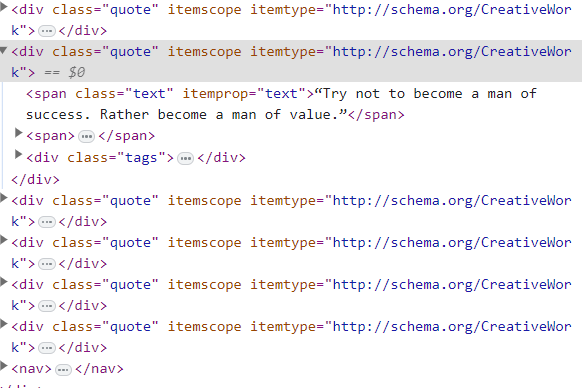

In [14]:
div_tags=doc.find_all('div',class_='quote')
len(div_tags)

10

> Ha encontrado 10 respuestas a nuestra consulta, lo que indicaría 10 quotes.

In [16]:
# Extraemos la infomación qeu esta en comillas

def get_quotes(div_tags):
    quotes=[]
    for tag in div_tags:
        quote=tag.find('span',class_='text').text
        quotes.append(quote)
    return quotes 

get_quotes(div_tags)

['“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”',
 '“It is our choices, Harry, that show what we truly are, far more than our abilities.”',
 '“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”',
 '“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”',
 "“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”",
 '“Try not to become a man of success. Rather become a man of value.”',
 '“It is better to be hated for what you are than to be loved for what you are not.”',
 "“I have not failed. I've just found 10,000 ways that won't work.”",
 "“A woman is like a tea bag; you never know how strong it is until it's in hot water.”",
 '“A day without sunshine is like, you know, night.”']

In [17]:
#Ahora extraemos por ejemplo, el nombre del autor
def get_author_name(div_tags):
    """Get the author names for the quotes for one page"""
    authors=[]
    for tag in div_tags:
        span_tag=tag.find('span',class_=None)
        author=span_tag.find('small',class_='author').text
        authors.append(author)
    return authors  

get_author_name(div_tags)

['Albert Einstein',
 'J.K. Rowling',
 'Albert Einstein',
 'Jane Austen',
 'Marilyn Monroe',
 'Albert Einstein',
 'André Gide',
 'Thomas A. Edison',
 'Eleanor Roosevelt',
 'Steve Martin']

In [19]:
# Presentamos la información en un data frame
df = pd.DataFrame()
df['Quote']= get_quotes(div_tags)
df['Author']=  get_author_name(div_tags)
df

,Quote,Author
0,“The world as we have created it is a process ...,Albert Einstein
1,"“It is our choices, Harry, that show what we t...",J.K. Rowling
2,“There are only two ways to live your life. On...,Albert Einstein
3,"“The person, be it gentleman or lady, who has ...",Jane Austen
4,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe
5,“Try not to become a man of success. Rather be...,Albert Einstein
6,“It is better to be hated for what you are tha...,André Gide
7,"“I have not failed. I've just found 10,000 way...",Thomas A. Edison
8,“A woman is like a tea bag; you never know how...,Eleanor Roosevelt
9,"“A day without sunshine is like, you know, nig...",Steve Martin


In [21]:
# Extraemos los tags(etiquetas) de cada quote
def get_quote_tag(div_tags):
    name_tags=[]
    for tag in div_tags:
        name_tag=tag.find('div',class_='tags').meta['content']
        name_tags.append(name_tag)
    return name_tags

get_quote_tag(div_tags)

['change,deep-thoughts,thinking,world',
 'abilities,choices',
 'inspirational,life,live,miracle,miracles',
 'aliteracy,books,classic,humor',
 'be-yourself,inspirational',
 'adulthood,success,value',
 'life,love',
 'edison,failure,inspirational,paraphrased',
 'misattributed-eleanor-roosevelt',
 'humor,obvious,simile']

In [20]:
# También se pueden extraer los enlaces que tiene de cada quote
def get_author_urls(div_tags):
    author_links=[]
    for tag in div_tags:
        span_tag=tag.find('span',class_=None)
        author_link='http://quotes.toscrape.com'+span_tag.find('a')['href']
        author_links.append(author_link)
    return author_links

get_author_urls(div_tags)

['http://quotes.toscrape.com/author/Albert-Einstein',
 'http://quotes.toscrape.com/author/J-K-Rowling',
 'http://quotes.toscrape.com/author/Albert-Einstein',
 'http://quotes.toscrape.com/author/Jane-Austen',
 'http://quotes.toscrape.com/author/Marilyn-Monroe',
 'http://quotes.toscrape.com/author/Albert-Einstein',
 'http://quotes.toscrape.com/author/Andre-Gide',
 'http://quotes.toscrape.com/author/Thomas-A-Edison',
 'http://quotes.toscrape.com/author/Eleanor-Roosevelt',
 'http://quotes.toscrape.com/author/Steve-Martin']

In [22]:
df['Tags']= get_quote_tag(div_tags)
df['URL']= get_author_urls(div_tags)
df

,Quote,Author,Tags,URL
0,“The world as we have created it is a process ...,Albert Einstein,"change,deep-thoughts,thinking,world",http://quotes.toscrape.com/author/Albert-Einstein
1,"“It is our choices, Harry, that show what we t...",J.K. Rowling,"abilities,choices",http://quotes.toscrape.com/author/J-K-Rowling
2,“There are only two ways to live your life. On...,Albert Einstein,"inspirational,life,live,miracle,miracles",http://quotes.toscrape.com/author/Albert-Einstein
3,"“The person, be it gentleman or lady, who has ...",Jane Austen,"aliteracy,books,classic,humor",http://quotes.toscrape.com/author/Jane-Austen
4,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe,"be-yourself,inspirational",http://quotes.toscrape.com/author/Marilyn-Monroe
5,“Try not to become a man of success. Rather be...,Albert Einstein,"adulthood,success,value",http://quotes.toscrape.com/author/Albert-Einstein
6,“It is better to be hated for what you are tha...,André Gide,"life,love",http://quotes.toscrape.com/author/Andre-Gide
7,"“I have not failed. I've just found 10,000 way...",Thomas A. Edison,"edison,failure,inspirational,paraphrased",http://quotes.toscrape.com/author/Thomas-A-Edison
8,“A woman is like a tea bag; you never know how...,Eleanor Roosevelt,misattributed-eleanor-roosevelt,http://quotes.toscrape.com/author/Eleanor-Roos...
9,"“A day without sunshine is like, you know, nig...",Steve Martin,"humor,obvious,simile",http://quotes.toscrape.com/author/Steve-Martin


## Web scraping de la página http://quotes.toscrape.com con Selenium

Primero instalamos selenium  
#!pip install -U selenium  
#!pip install webdriver-manager

In [24]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import time

In [35]:
from selenium.webdriver.common.by import By
driver = webdriver.Chrome()

driver.get("http://quotes.toscrape.com/")

time.sleep(5)

#Encontramos elements
quotes = driver.find_elements(By.CLASS_NAME, "text")
authors = driver.find_elements(By.CLASS_NAME, "author")
tags = driver.find_elements(By.CLASS_NAME, "tags")


In [30]:
for quote in quotes:
    quote= quote.text.strip()
    print(quote)

“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”
“It is our choices, Harry, that show what we truly are, far more than our abilities.”
“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”
“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”
“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”
“Try not to become a man of success. Rather become a man of value.”
“It is better to be hated for what you are than to be loved for what you are not.”
“I have not failed. I've just found 10,000 ways that won't work.”
“A woman is like a tea bag; you never know how strong it is until it's in hot water.”
“A day without sunshine is like, you know, night.”


In [31]:
for author in authors:
    author= author.text.strip()
    print(author)

Albert Einstein
J.K. Rowling
Albert Einstein
Jane Austen
Marilyn Monroe
Albert Einstein
André Gide
Thomas A. Edison
Eleanor Roosevelt
Steve Martin


In [36]:
for tag in tags:
    tag= tag.text.strip()
    print(tag)

Tags: change deep-thoughts thinking world
Tags: abilities choices
Tags: inspirational life live miracle miracles
Tags: aliteracy books classic humor
Tags: be-yourself inspirational
Tags: adulthood success value
Tags: life love
Tags: edison failure inspirational paraphrased
Tags: misattributed-eleanor-roosevelt
Tags: humor obvious simile


> Hemos visto como como extraer la información mediante Selenium y BeautifulSup. Desde mi punto de vista, me gustó extraer más los datos con Selenium, lo he sentido más fácil. Así como los datos un tanto, más limpios, por ejemplo las quotes, sin comillas o espacios que restan limpieza a los datos. 

## Web scraping de la página https://es.wikipedia.org/wiki/Mr._Robot con BeautifulSoup

### Extraemos el título, primer parrafo y las diferentes secciones

In [55]:
import requests
from bs4 import BeautifulSoup

url = "https://es.wikipedia.org/wiki/Mr._Robot"
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

titulo = soup.find(id="firstHeading").text
print("Título: ", titulo)

introduccion = soup.find(class_="mw-parser-output").p
if introduccion:
    print("Introducción: ", introduccion.text)
else:
    print("No se encontró la introducción.")

secciones = soup.find_all("span", class_="mw-headline")
print("Secciones:")
for seccion in secciones:
    print(seccion.text)


Título:  Mr. Robot
Introducción:  Mr. Robot es una serie de televisión de género tecno-thriller y drama estadounidense creada por Sam Esmail. Está protagonizada por Rami Malek como Elliot Alderson, un ingeniero de seguridad informática y pirata informático que padece un trastorno de identidad disociativo, trastorno de ansiedad social y depresión clínica.

Secciones:
Sinopsis
Elenco y personajes
Episodios
Producción
Concepción y desarrollo
Precisión técnica
Recepción
Respuesta crítica
Temporada 1
Temporada 2
Temporada 3
Reconocimientos
Listas Top 10 de los críticos
Referencias
Enlaces externos


### Extraemos la tabla de contenido. (Beautiful Soup)

Me parece interesante extraer la información de la tabla de resumen que generalmente se muestra en wikipedia en la parte derecha. En el caso de las
películas o series, muestra los protagonistas, quién la dirigio...etc.

In [56]:
url = "https://es.wikipedia.org/wiki/Mr._Robot"
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

tabla = soup.find("table", class_="infobox")
if tabla:
    filas = tabla.find_all("tr")
    print("Tabla de información:")
    for fila in filas:
        celdas = fila.find_all(["th", "td"])
        if len(celdas) == 2:
            titulo = celdas[0].text.strip()
            contenido = celdas[1].text.strip()
            print(f"{titulo}: {contenido}")
else:
    print("No se encontró la tabla de información.")


Tabla de información:
Dirigido por: Sam Esmail
Protagonistas: Rami Malek
Carly Chaikin
Portia Doubleday
Martin Wallström
Christian Slater
Michael Cristofer
Stephanie Corneliussen
Grace Gummer
BD Wong
Bobby Cannavale
N.º de episodios: (lista de episodios)
Última emisión: 23 de diciembre de 2019


## Web scraping de la página https://es.wikipedia.org/wiki/Mr._Robot con BeautifulSoup
### Extraemos el título, primer parrafo y las diferentes secciones

In [64]:
driver = webdriver.Chrome()

url = "https://es.wikipedia.org/wiki/Mr._Robot"
driver.get(url)

titulo = driver.find_element(By.ID, "firstHeading").text
print("Título:", titulo)

introduccion = driver.find_element(By.CLASS_NAME, "mw-parser-output").find_element(By.TAG_NAME, "p")
if introduccion:
    print("Introducción:", introduccion.text)
else:
    print("No se encontró la introducción.")

secciones = driver.find_elements(By.CSS_SELECTOR, "span.mw-headline")
print("Secciones:")
for seccion in secciones:
    print(seccion.text)

driver.quit()


Título: Mr. Robot
Introducción: Mr. Robot es una serie de televisión de género tecno-thriller y drama estadounidense creada por Sam Esmail. Está protagonizada por Rami Malek como Elliot Alderson, un ingeniero de seguridad informática y pirata informático que padece un trastorno de identidad disociativo, trastorno de ansiedad social y depresión clínica.
Secciones:
Sinopsis
Elenco y personajes
Episodios
Producción
Concepción y desarrollo
Precisión técnica
Recepción
Respuesta crítica
Temporada 1
Temporada 2
Temporada 3
Reconocimientos
Listas Top 10 de los críticos
Referencias
Enlaces externos


### Extraemos la tabla de contenido. (Selenium)

In [60]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By

driver = webdriver.Chrome()
url = "https://es.wikipedia.org/wiki/Mr._Robot"
driver.get(url)

tabla = driver.find_element(By.CSS_SELECTOR, "table.infobox")
if tabla:
    filas = tabla.find_elements(By.TAG_NAME, "tr")
    print("Tabla de información:")
    for fila in filas:
        celdas = fila.find_elements(By.CSS_SELECTOR, "th, td")
        if len(celdas) == 2:
            titulo = celdas[0].text.strip()
            contenido = celdas[1].text.strip()
            print(f"{titulo}: {contenido}")
else:
    print("No se encontró la tabla de información.")

driver.quit()


Tabla de información:
Dirigido por: Sam Esmail
Protagonistas: Rami Malek
Carly Chaikin
Portia Doubleday
Martin Wallström
Christian Slater
Michael Cristofer
Stephanie Corneliussen
Grace Gummer
BD Wong
Bobby Cannavale
N.º de episodios: (lista de episodios)
Última emisión: 23 de diciembre de 2019


# Exercici 2
Documenta en un Word el teu conjunt de dades generat amb la informació que tenen els diferents arxius de Kaggle.

> En el repositorio se encuentra el archivo de Word con el ejercicio.

# Exercici 3
Tria una pàgina web que tu vulguis i realitza web scraping mitjançant la llibreria Selenium primer i Scrapy després.

> He elegido hacer webscraping de la página de noticias de la BBC, me parece interesante por ejemplo crear un script que todos los días extraiga las noticias y tener el historial de los titulares sobre un determinado periodo de tiempo. Después analizar estos titulares mediante técnicas como análisis de sentimiento. Se podría observar que es lo que transmite cada periodico a lo largo de los días, semanas. ¿Será que todos los periodicos o la mayoría transmiten las noticias con la misma intención? ¿En que países son mas negativos u optimistas al transmitir la información?

He tenido problemas con scrapy, así que he realizado la busqueda con beautiful soup y con selenium.

## Extracción de datos mediante beautifulSoup

In [80]:
#URL
url = "https://www.bbc.com/news"
response = requests.get(url)

# creamos el objeto
soup = BeautifulSoup(response.text, "html.parser")

# Encontrar todos los elementos <a> que contienen los títulos de las noticias
news_titles = soup.find_all("a", class_="gs-c-promo-heading")

# Imprimimos en pantalla
for title in news_titles:
    print(title.get_text(strip=True))

What will it take for Ukraine's offensive to succeed?
What will it take for Ukraine's offensive to succeed?
Former Italian PM Silvio Berlusconi dies at 86
Berlusconi, the belly dancer and the bunga bunga parties
Here's how Trump's historic day in court will unfold
France shooting suspect under investigation for murder
Plane crash mum told her children to leave her and survive
Fans celebrate Man City's historic Treble
Damon and Affleck's studio condemn Trump ad
UK mother jailed for taking abortion pills too late
NZ radio station sorry for 'pro-Kremlin garbage'
Biden to have root canal procedure at White House
NZ radio station sorry for 'pro-Kremlin garbage'
Biden to have root canal procedure at White House
US Senate investigating PGA Tour-PIF agreement
World court asked to rule on Syria torture claims
JP Morgan agrees to pay $290m to Epstein victims
VideoWATCH: Memorable moments from Silvio Berlusconi's life
BBC World News TV
AudioBBC World Service Radio
How children survived 40 days in

## Extracción de datos mediante Selenium

In [79]:

driver = webdriver.Chrome()

# URL
url = 'https://www.bbc.com/news'
driver.get(url)

# Encontrar todos los elementos <a> que contienen los títulos de las noticias
news_titles = driver.find_elements(By.CSS_SELECTOR, 'a.gs-c-promo-heading')

# Imprimir los títulos de las noticias
for title in news_titles:
    print(title.text)

# Cerrar el controlador de Selenium y finalizar la sesión
driver.quit()


What will it take for Ukraine's offensive to succeed?

Former Italian PM Silvio Berlusconi dies at 86
Berlusconi, the belly dancer and the bunga bunga parties
Here's how Trump's historic day in court will unfold
France shooting suspect under investigation for murder
Plane crash mum told her children to leave her and survive
Fans celebrate Man City's historic Treble
Damon and Affleck's studio condemn Trump ad
UK mother jailed for taking abortion pills too late


NZ radio station sorry for 'pro-Kremlin garbage'
Biden to have root canal procedure at White House
US Senate investigating PGA Tour-PIF agreement
World court asked to rule on Syria torture claims
JP Morgan agrees to pay $290m to Epstein victims
WATCH: Memorable moments from Silvio Berlusconi's life
BBC World News TV
BBC World Service Radio
How children survived 40 days in Colombian jungle
McGregor 'injures mascot' in half-time stunt
Driver disguises himself as car seat for study
Why has India stopped winning top cricket trophies

> En esta ocasión los datos extraídos con beautiful soup parecen más limpios.

CONCLUSIONES GENERALES: 

* Aunque al inicio dependiendo de las habilidades del programador parezca que una librería es más difícil que otra, hay que utilizar las librerías en diferentes escenarios para observar sus resultados.  Al final beautifulSoup como Selenium son muy potentes. Hay otras herramientas como fue el caso de Scrapy que tal vez hay que dedicar más tiempo al inicio.

* En ocasiones, es importante poner un "timeDelay" para que las páginas no piensen que es un robot el que realiza las peticiones.  

* Web Scraping es un concepto muy útil e interesante que de perfeccionarlo puede aportar información importante para la investigación.  